# Comparing similarity judgments among blind individuals to word embeddings

Sean Trott (4/16/2019)

## Load verbs

In [37]:
import pandas as pd

from tqdm import tqdm

In [38]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")

In [39]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


## Obtain word embeddings for each word

In [40]:
from allennlp.commands.elmo import ElmoEmbedder

In [41]:
elmo = ElmoEmbedder()

In [42]:
embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0].tolist()
    
    embeddings.append(decontextualized)

100%|██████████| 105/105 [01:02<00:00,  1.40it/s]


In [43]:
df_verbs['embedding'] = embeddings

## Dimensionality reduce

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

In [46]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [47]:
# Kind of ugly, fix later
df_verbs['pc1'] = list(principalDf['pc1'])
df_verbs['pc2'] = list(principalDf['pc2'])

In [48]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...",-0.078595,-2.329108
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...",-2.234155,2.978767
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633142709732, 1.394661545753479, 0.059...",-2.213300,0.444036
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.2201690673828125, 0.06947101652622223, -0.7...",-3.475894,0.028073
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750277757644653, 0.289326548576355, 0.46...",-4.541126,2.260716


## Plot

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


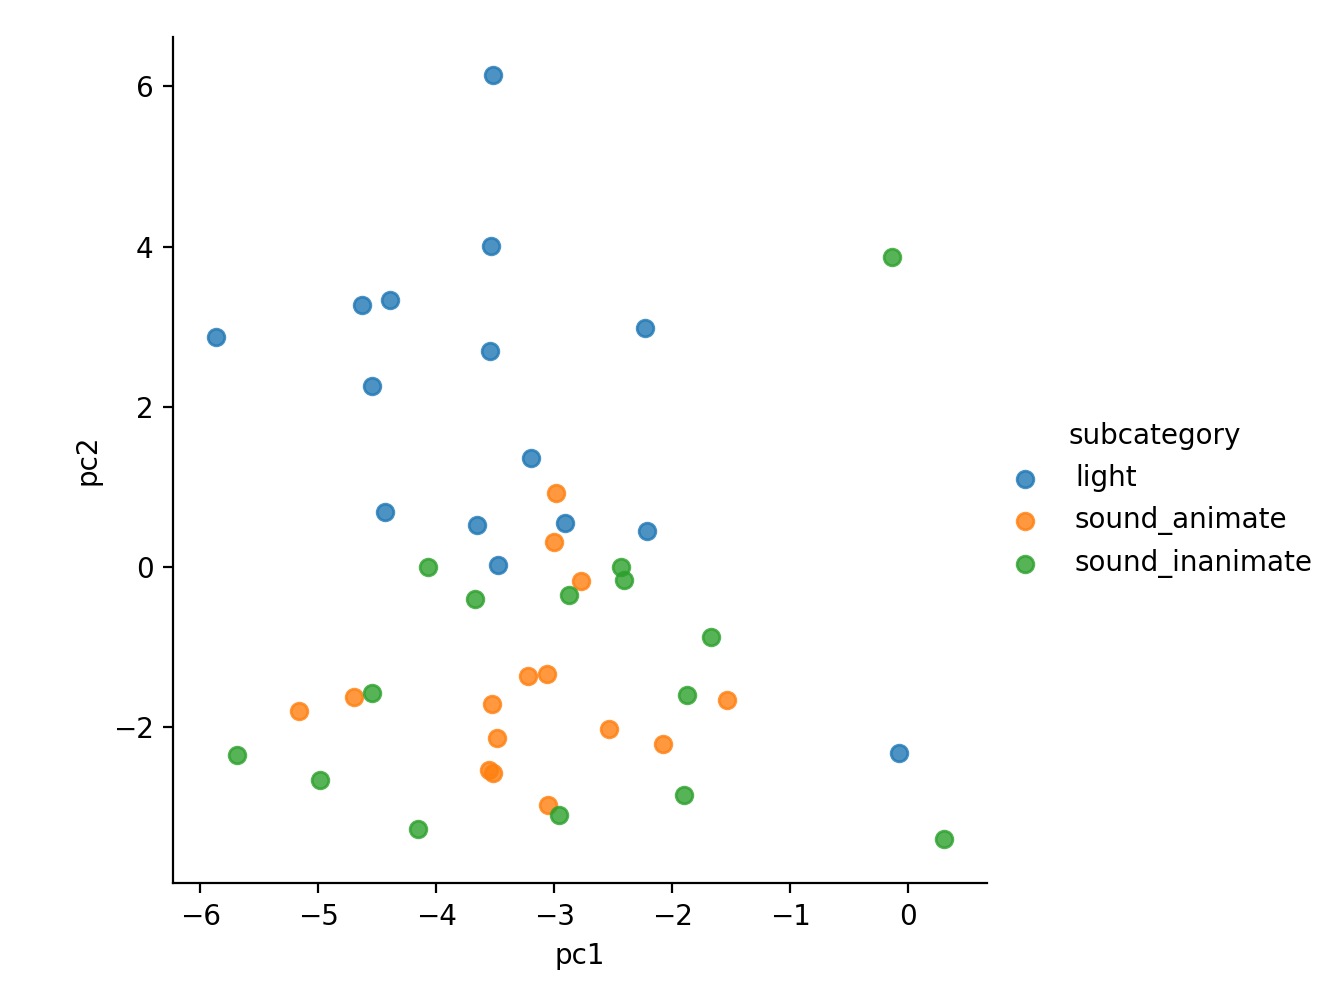

In [50]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory', 
           legend=True)

<IPython.core.display.Javascript object>


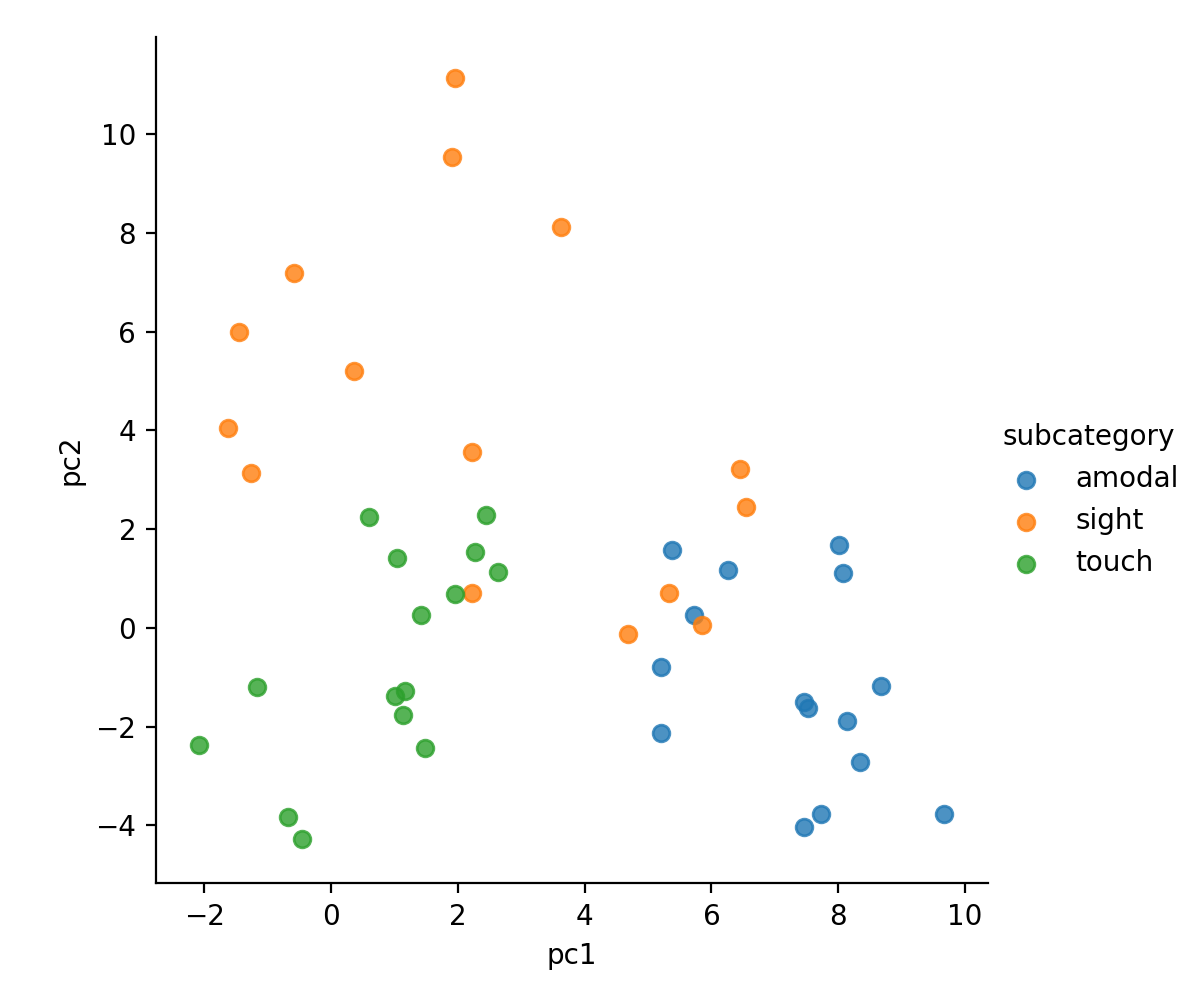

In [117]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

## Hierarchical clustering

### For sight perception

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [57]:
df_sighted = df_verbs[df_verbs['subcategory']=="sight"]
len(df_sighted)

15

In [58]:
X = df_sighted[['pc1', 'pc2']].values

In [59]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


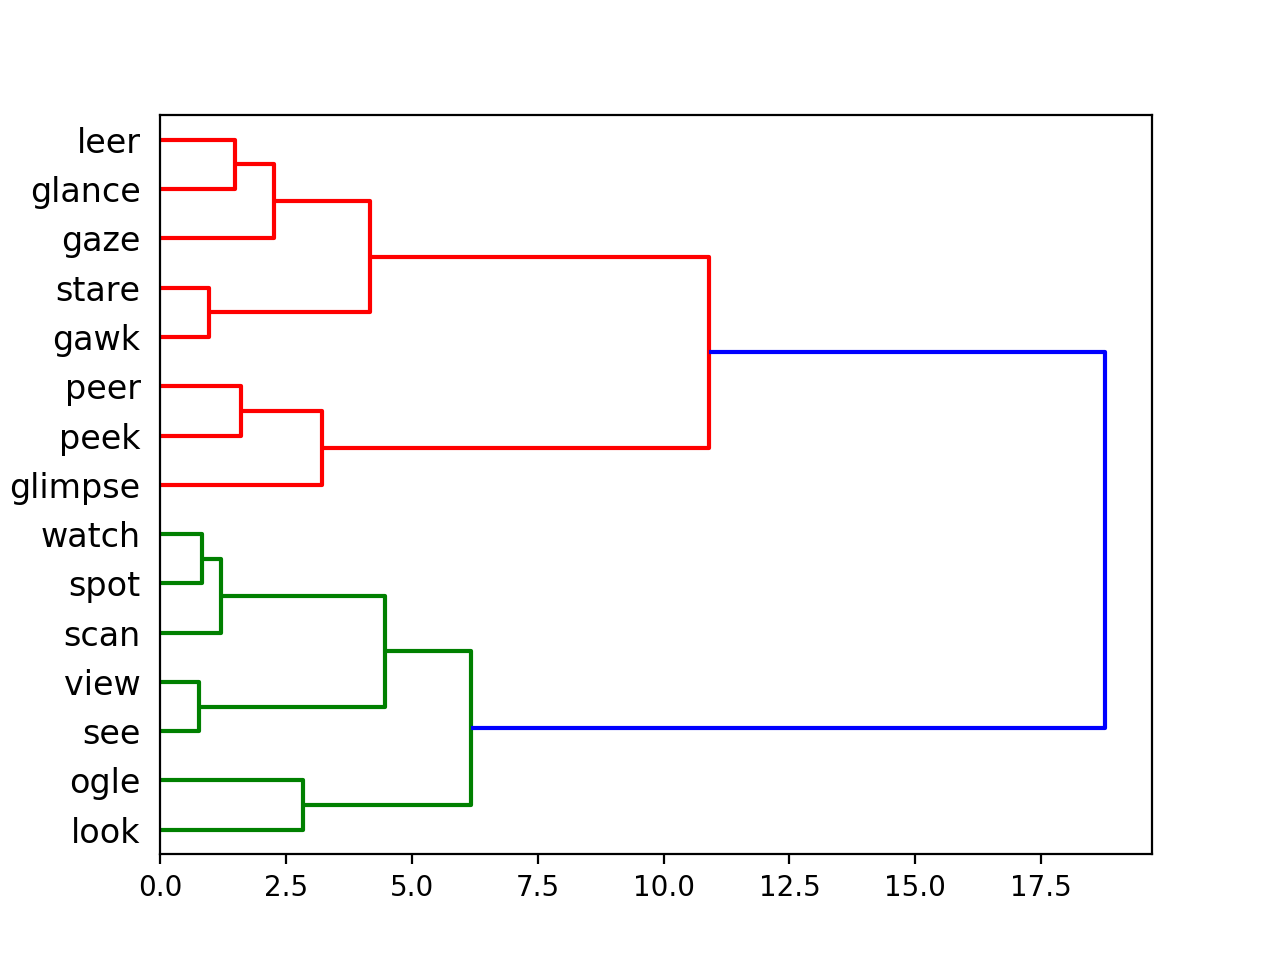

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [25.625, 25.625, 101.875, 101.875]],
 'dcoord': [[0.0, 2.842821502353081, 2.842821502353081, 0.0],
  [0.0, 0.7694132971287395, 0.7694132971287395, 0.0],
  [0.0, 0.8313942464569082, 0.8313942464569082, 0.0],
  [0.0, 1.2079326460385535, 1.2079326460385535, 0.8313942464569082],
  [0.7694132971287395,
   4.469037166348356,
   4.469037166348356,
   1.2079326460385535],
  [2.842821502353081,
   6.1764010009756145,
   6.1764010009756145,
   4.469037166348356],
  [0.0, 1.616505614844954, 1.616505614844954, 0.0],
  [0.0, 3.2241248294041918, 3.2241248294041918, 1.616505614844954],
  [0.0, 0.9803870145602762

In [60]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_sighted['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

In [61]:
df_verbs.to_csv("data/processed/verbs_with_embeddings.csv")

## Get similarity scores

In [62]:
import itertools
import scipy
import ast

In [63]:
df_verbs = pd.read_csv("data/processed/verbs_with_embeddings.csv")

In [64]:
# For now just use PCA dimensions
def extract_pca(row):
    pc1, pc2 = row['pc1'], row['pc2']
    return [pc1, pc2]
df_verbs['pca_combined'] = df_verbs.apply(lambda row: extract_pca(row), axis=1)

In [65]:
df_verbs['concat_test'] = df_verbs['embedding'].map(str) + "*" + df_verbs['verb']

In [72]:
analysis = []
for item1, item2 in tqdm(list(itertools.combinations(list(df_verbs['concat_test']), 2))):
    
    e1, e2 = ast.literal_eval(item1.split("*")[0]), ast.literal_eval(item2.split("*")[0])
    w1, w2 = item1.split("*")[1], item2.split("*")[1]

    # e1 = elmo.embed_sentence(w1)[0][0]
    # e2 = elmo.embed_sentence(w2)[0][0]
    
    embedding_distance = scipy.spatial.distance.cosine(e1, e2)
    
    analysis.append({
        'w1': w1,
        'w2': w2,
        'cosine_distance': embedding_distance
    })


100%|██████████| 5460/5460 [01:14<00:00, 73.07it/s] 


In [74]:
df_analysis = pd.DataFrame(analysis)
df_analysis.head(5)

,cosine_distance,w1,w2
0,0.900461,blaze,blink
1,0.780368,blaze,flare
2,0.929387,blaze,flash
3,0.865661,blaze,flicker
4,0.856313,blaze,gleam


In [75]:
df_analysis.to_csv("data/processed/verb_embedding_distances.csv")

## Load ppt data

In [76]:
df_participant_judgments = pd.read_csv("data/datalong_CBSAMT.csv")

In [77]:
df_participant_judgments.head(5)

,C1,C2,S1,S2,Category,V1,V2,S_01,S_02,S_03,...,CB_31,CB_32,CB_33,CB_34,CB_35,CB_37,CB_38,CB_40,CB_41,AMT_av
0,Sound,Sound,Sanim,Sinanim,Emission,bark,beep,1,3,4,...,1,1.0,1.0,1.0,2.0,1.0,2,1.0,2.0,2.351351
1,Sound,Sound,Sanim,Sanim,Emission,bark,bellow,1,5,5,...,1,4.0,4.0,7.0,4.0,4.0,3,1.0,5.0,4.705882
2,Sound,Light,Sanim,Light,Emission,bark,blaze,1,1,1,...,1,1.0,1.0,6.0,1.0,1.0,1,1.0,5.0,2.184211
3,Sound,Light,Sanim,Light,Emission,bark,blink,1,1,4,...,1,1.0,1.0,7.0,1.0,1.0,1,1.0,2.0,1.657895
4,Sound,Sound,Sanim,Sinanim,Emission,bark,boom,2,3,4,...,1,1.0,1.0,6.0,1.0,4.0,3,1.0,5.0,4.228571


In [78]:
len(df_participant_judgments)

2806

In [79]:
len(df_analysis)

5460

### Combine

In [99]:
def combine_words(row, word1='w1', word2='w2'):
    w1, w2 = row[word1], row[word2]
    return '_'.join(sorted([w1, w2]))

In [108]:
df_participant_judgments['combined_words'] = df_participant_judgments.apply(
    lambda row: combine_words(row, word1='V1', word2='V2'), axis=1)

In [109]:
df_analysis['combined_words'] = df_analysis.apply(lambda row: combine_words(row), axis=1)

In [110]:
df_analysis_subset = df_analysis[df_analysis['combined_words'].isin(list(df_participant_judgments['combined_words']))]

In [129]:
df_merged = pd.merge(df_analysis, df_participant_judgments)
df_merged['same_modality'] = df_merged['C1'] == df_merged['C2']

In [130]:
df_merged.head(5)

,cosine_distance,w1,w2,combined_words,C1,C2,S1,S2,Category,V1,...,CB_32,CB_33,CB_34,CB_35,CB_37,CB_38,CB_40,CB_41,AMT_av,same_modality
0,0.900461,blaze,blink,blaze_blink,Light,Light,Light,Light,Emission,blaze,...,1.0,3.0,1.0,1.0,1.0,3,1.0,2.0,2.000,True
1,0.780368,blaze,flare,blaze_flare,Light,Light,Light,Light,Emission,blaze,...,4.0,4.0,7.0,4.0,7.0,5,7.0,6.0,4.725,True
2,0.929387,blaze,flash,blaze_flash,Light,Light,Light,Light,Emission,blaze,...,5.0,4.0,7.0,3.0,7.0,4,4.0,6.0,4.025,True
3,0.865661,blaze,flicker,blaze_flicker,Light,Light,Light,Light,Emission,blaze,...,2.0,3.0,1.0,1.0,7.0,3,3.0,3.0,3.750,True
4,0.856313,blaze,gleam,blaze_gleam,Light,Light,Light,Light,Emission,blaze,...,2.0,3.0,4.0,1.0,7.0,5,5.0,4.0,3.225,True


In [131]:
df_merged.to_csv("data/processed/judgments_with_embeddings.csv")

<IPython.core.display.Javascript object>


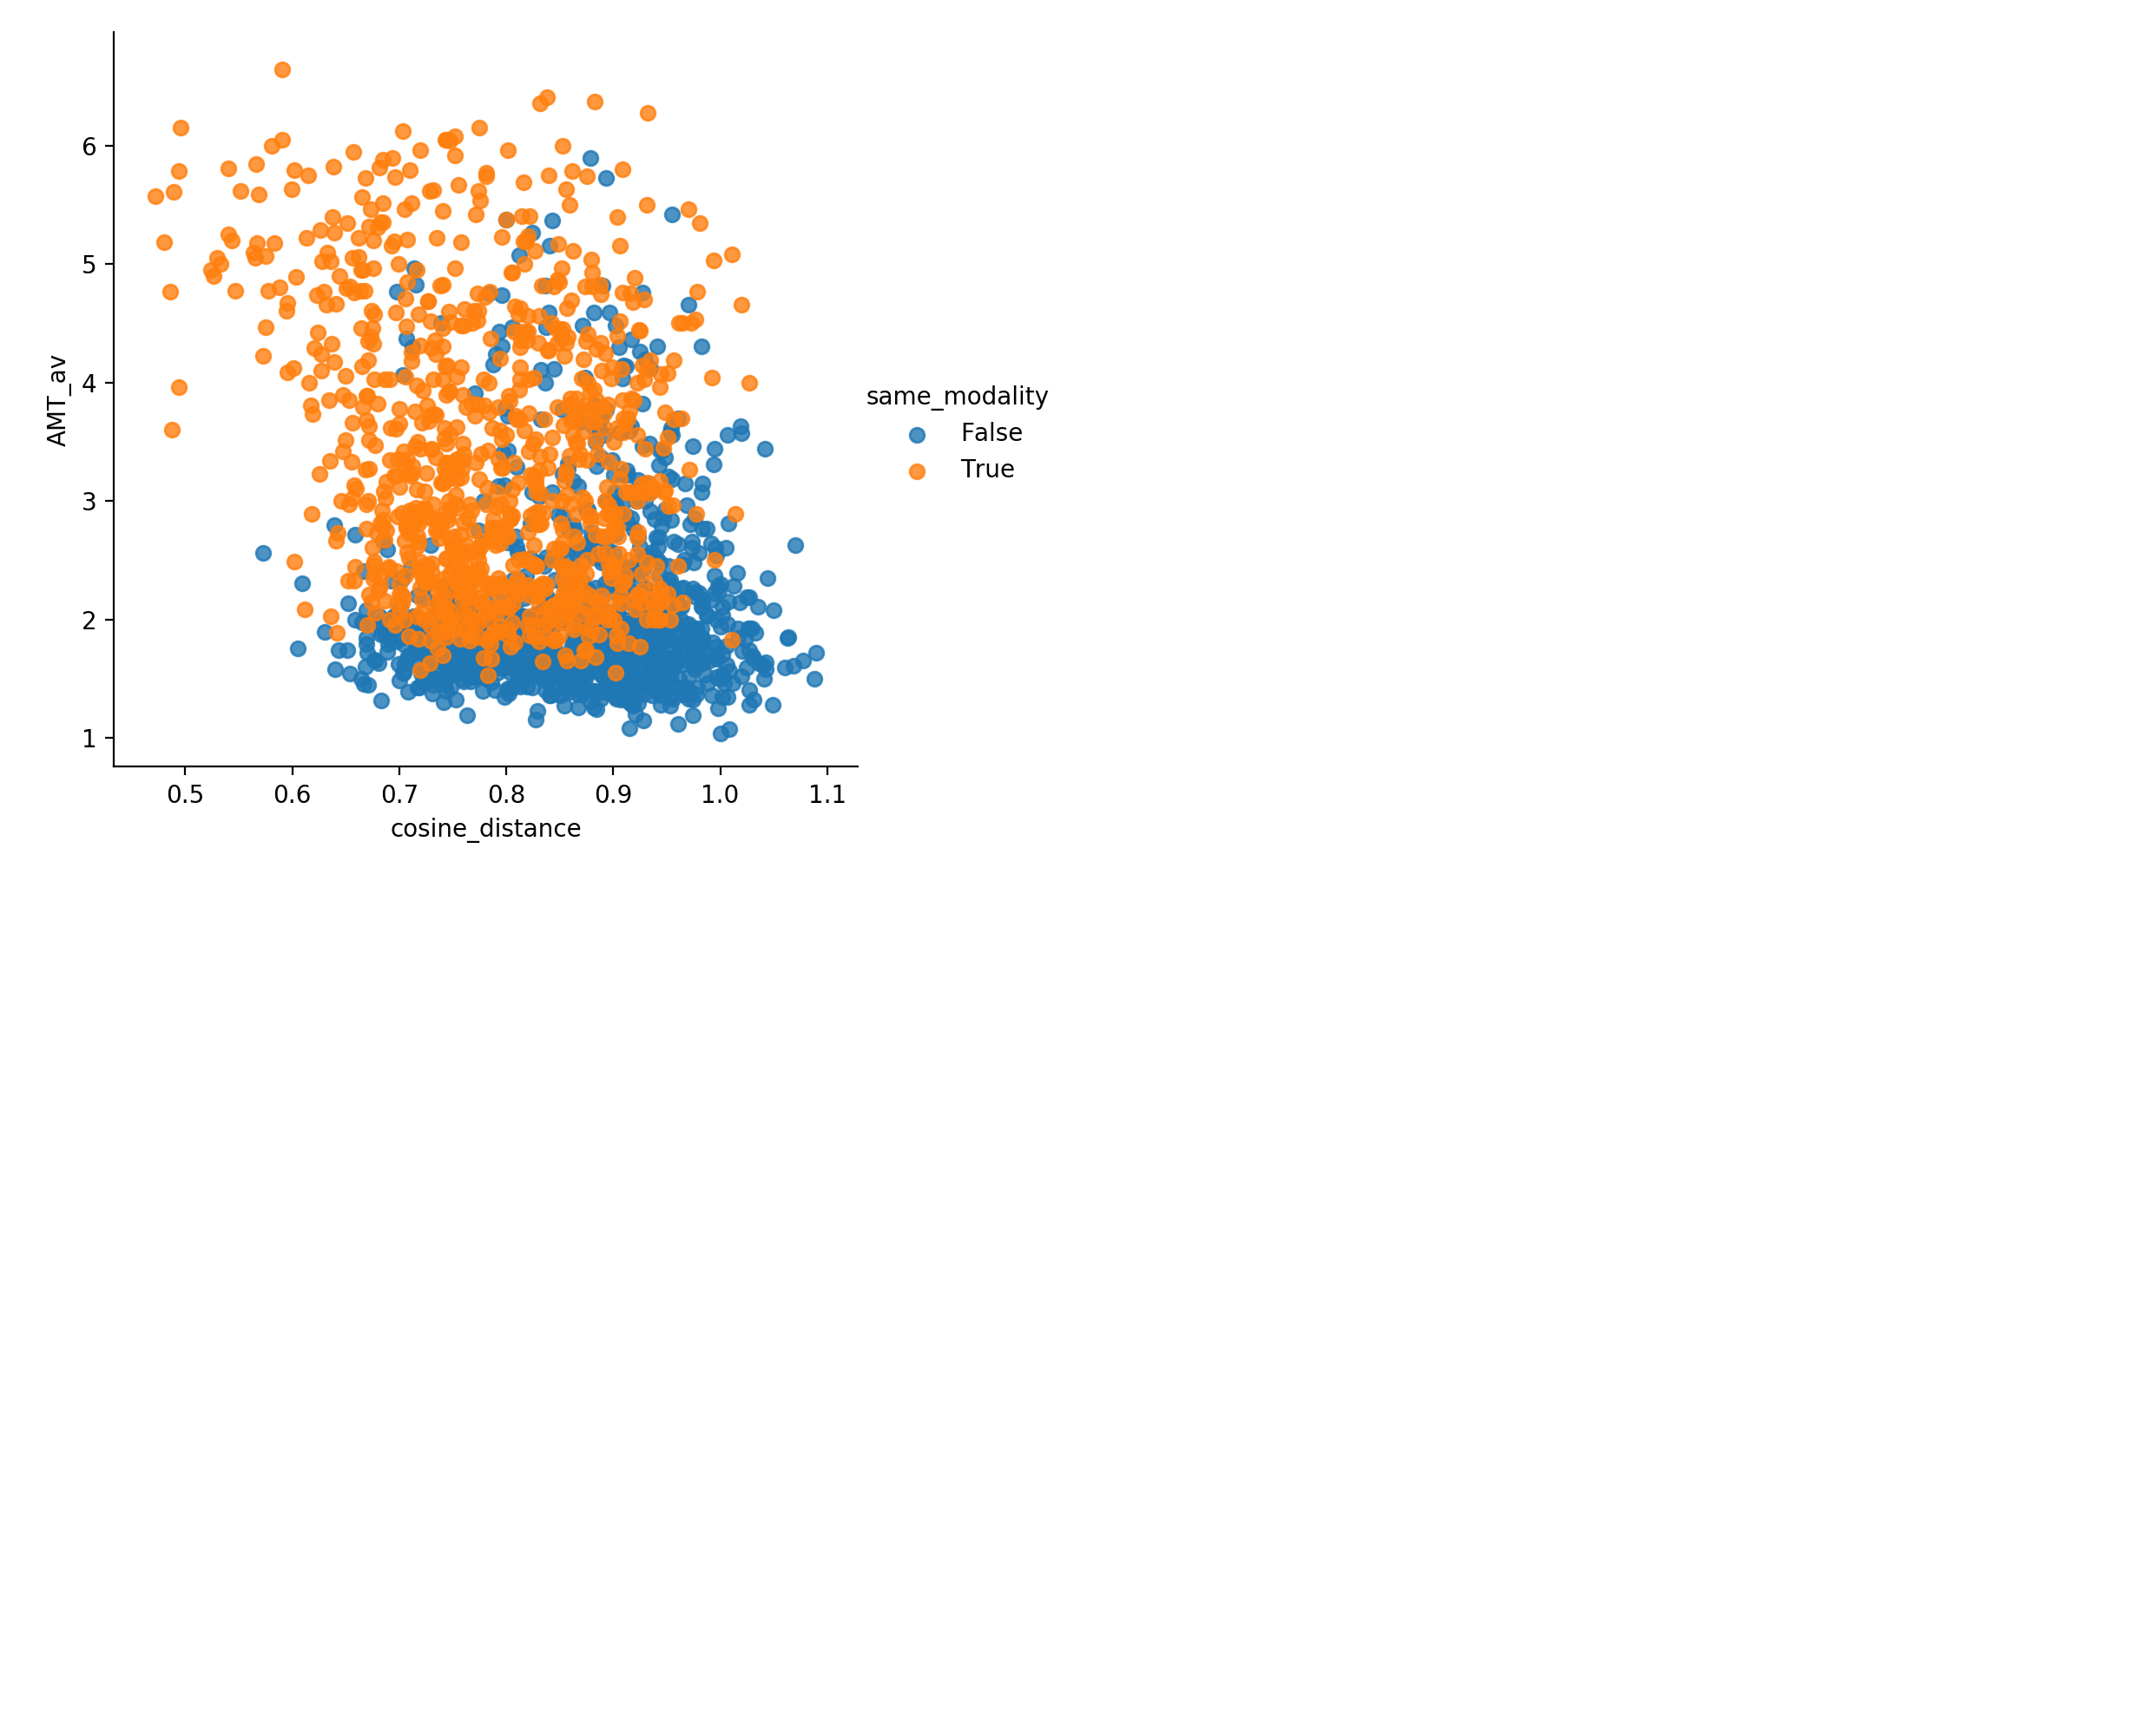

In [132]:
sns.lmplot(x="cosine_distance", y="AMT_av", data=df_merged, 
           fit_reg=False, hue='same_modality',
           legend=True)

### Briefly test stats

Predicting amazon turk estimates.

In [122]:
import statsmodels.formula.api as sm

In [133]:
result = sm.ols(formula="AMT_av ~ cosine_distance * same_modality", data=df_merged).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AMT_av   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     340.2
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          7.61e-179
Time:                        09:21:08   Log-Likelihood:                -2756.9
No. Observations:                2027   AIC:                             5522.
Df Residuals:                    2023   BIC:                             5544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.6894      0.268      6.302      0.000       1.164       2.215
same_modality[T.True]                     3.9031      0.363     10.738      0.000       3.190       4.616
cosine_distance                           0.4483      0.309      1.452      0.147      -0.157       1.054
cosine_distance:same_modality[T.True]    -3.2917      0.438     -7.518      0.000      -4.150      -2.433
==============================================================================
Omnibus:                      272.555   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.405
Skew:                           0.986   Prob(JB):                     5.06e-87
Kurtosis:                       3.902   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modeling similarity judgments by group

In [180]:
df_merged = pd.read_csv("data/processed/judgments_with_embeddings.csv")

In [149]:
sighted_columns = ['S_01', 'S_02', 'S_03', 'S_04', 'S_05', 'S_07',
       'S_08', 'S_09', 'S_10', 'S_11', 'S_12', 'S_13', 'S_14', 'S_16', 'S_17',
       'S_18', 'S_19', 'S_20', 'S_21', 'S_22', 'S_23', 'S_24']
blind_columns = ['CB_06',
       'CB_08', 'CB_09', 'CB_14', 'CB_15', 'CB_18', 'CB_19', 'CB_22', 'CB_23',
       'CB_24', 'CB_25', 'CB_26', 'CB_27', 'CB_28', 'CB_29', 'CB_30', 'CB_31',
       'CB_32', 'CB_33', 'CB_34', 'CB_35', 'CB_37', 'CB_38', 'CB_40', 'CB_41']

In [196]:
def get_group_average(row, columns):
    row = row.fillna(0)
    row_col = row[columns].values
    # row_col = [i for i in row_col if i >0 ]
    return row_col.mean()

In [197]:
df_merged['blind_avg'] = df_merged.apply(lambda x: get_group_average(x, columns=blind_columns), 
                                         axis=1)

In [198]:
df_merged['sighted_avg'] = df_merged.apply(lambda x: get_group_average(x, columns=sighted_columns), 
                                         axis=1)

<IPython.core.display.Javascript object>


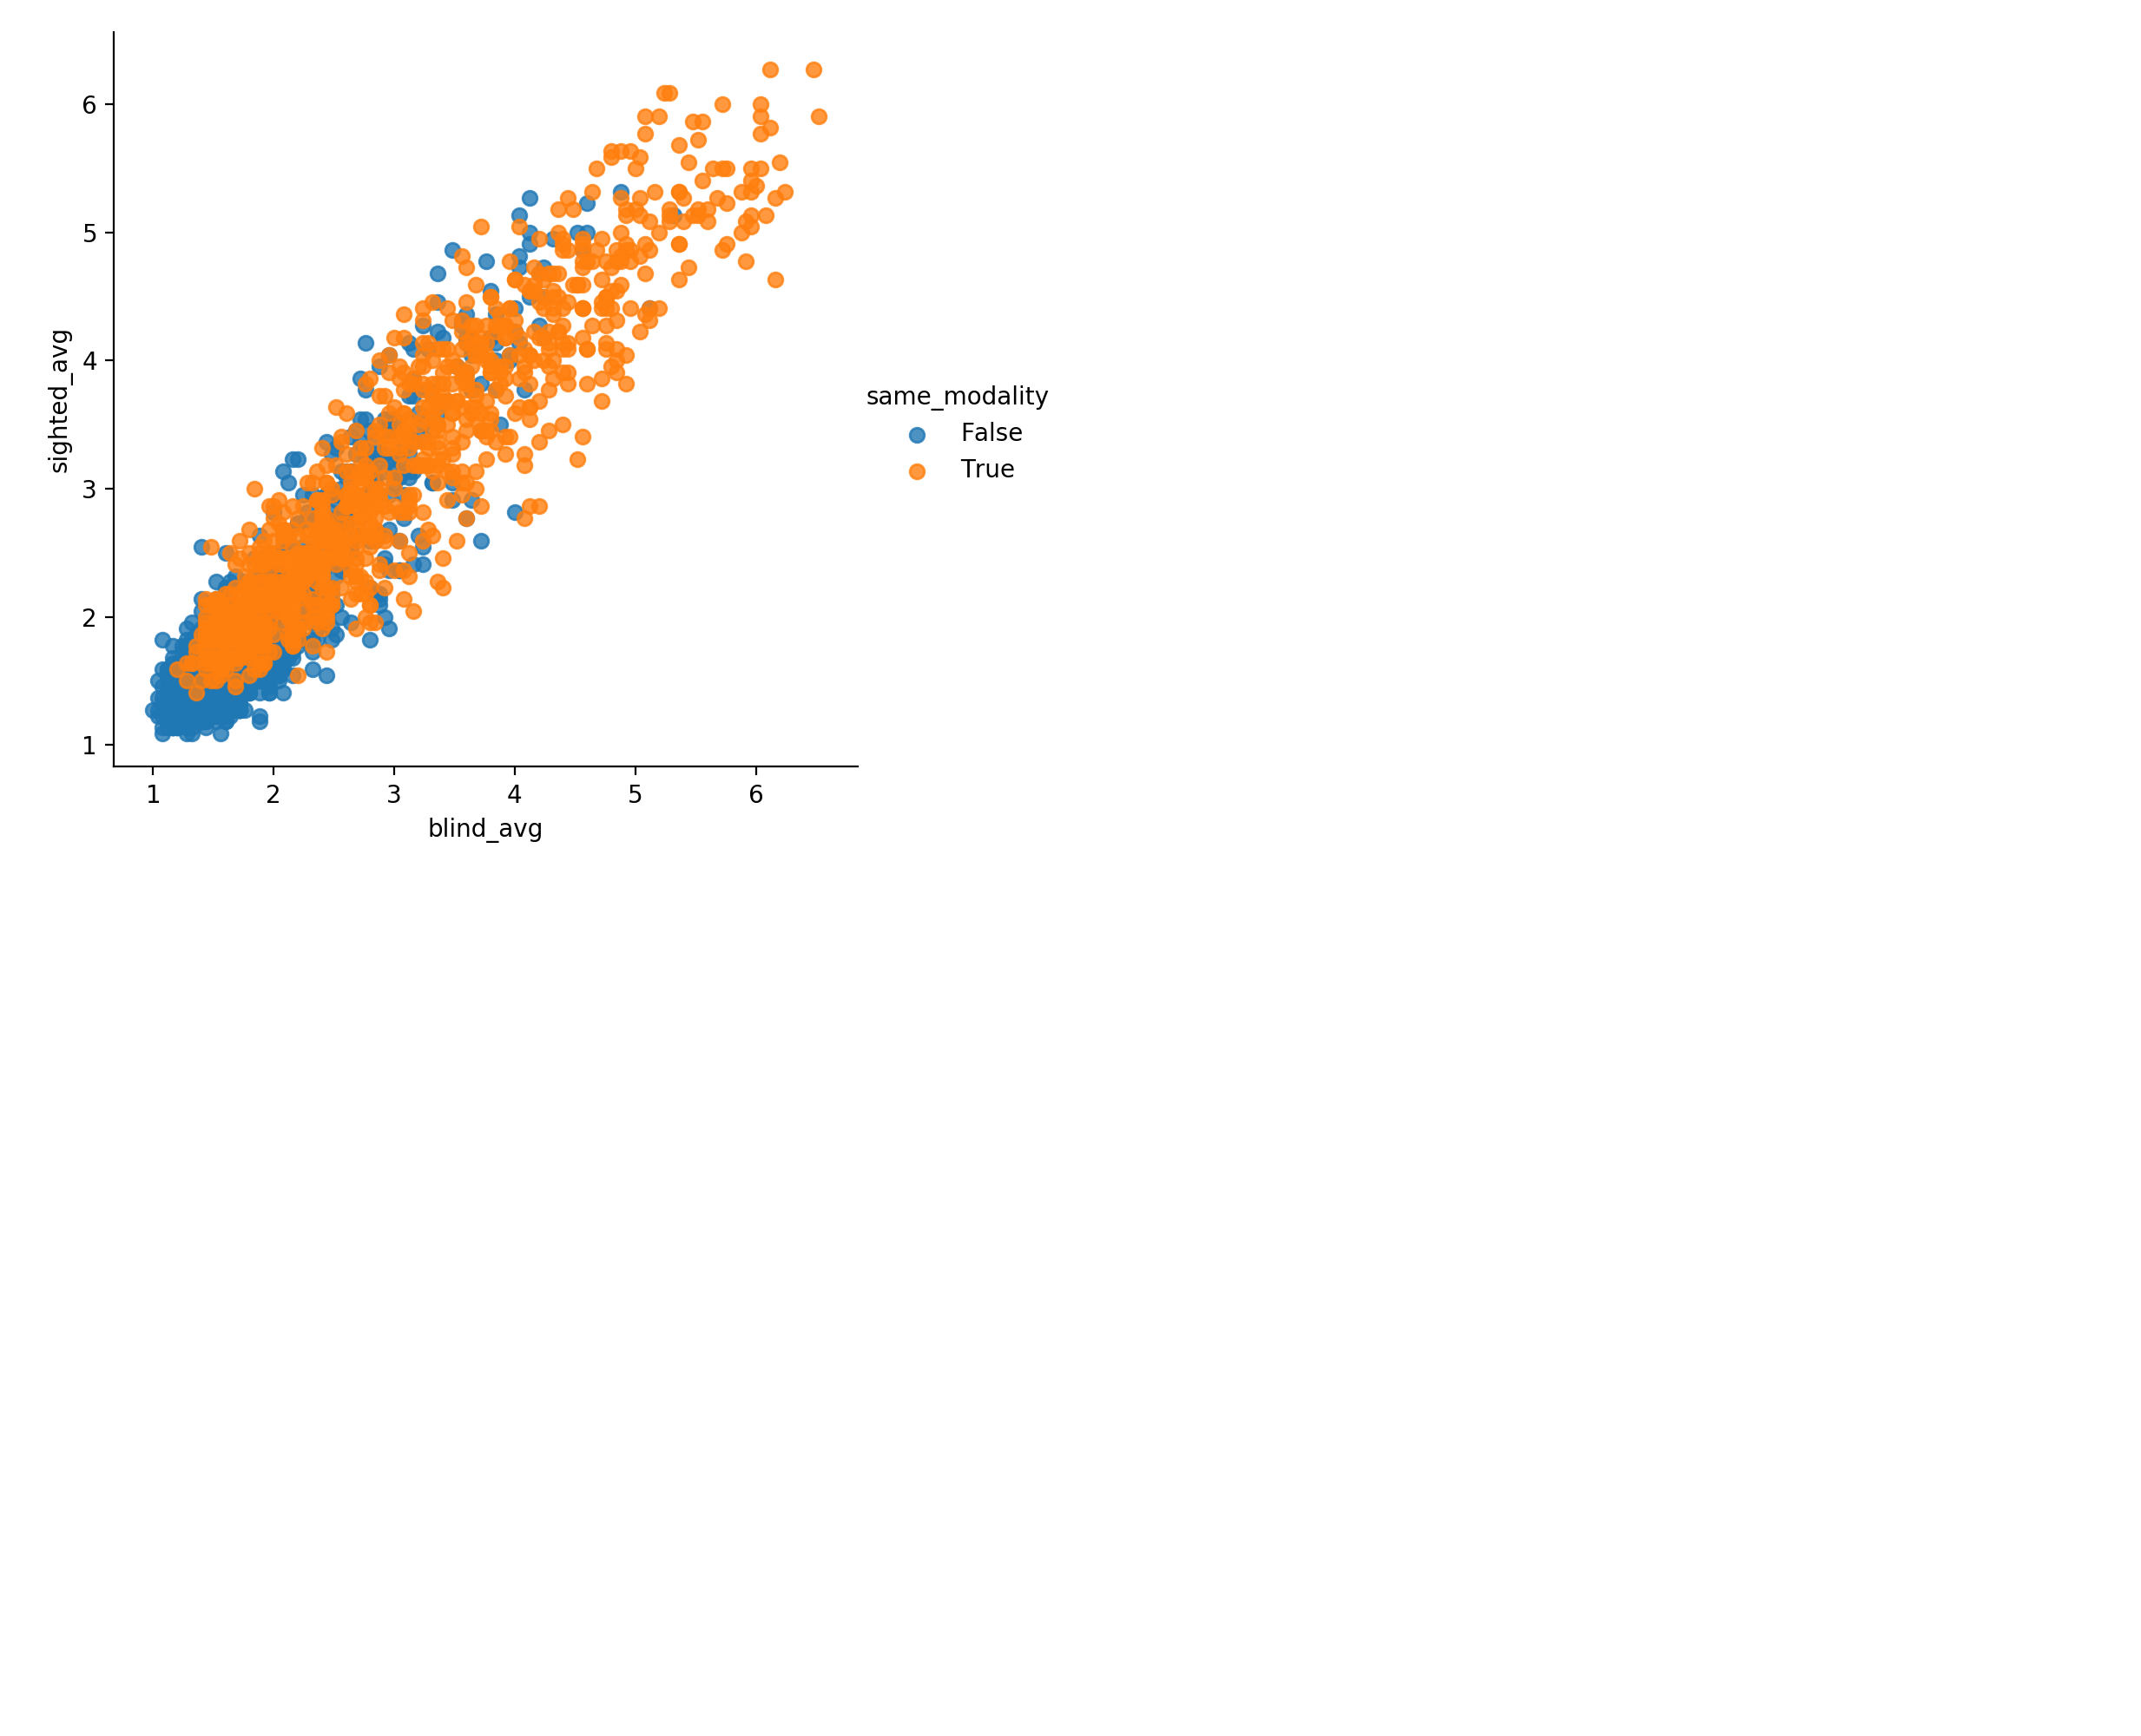

In [199]:
sns.lmplot(x="blind_avg", y="sighted_avg", data=df_merged, 
           fit_reg=False, hue='same_modality',
           legend=True)